In [1]:
import pandas as pd
import seaborn as sns


#from sklearn.neighbors import DistanceMetric
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

import os
os.chdir(r"D:\IME Q2 - ADR Artigo\Insurance-Mathematics-Economics-ADR-")

In [2]:
#Read the data from GitHub directly
url = "https://github.com/renatoquiliche/Insurance-Mathematics-Economics-ADR/blob/main/Databases/insurance.csv?raw=true"

data_insurance = pd.read_csv(url)

In [3]:
#Missing values computation
data_insurance.info()
#Data nao tem missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Pre-processing for FAMD

categorical = pd.get_dummies(data_insurance[["sex","smoker", "region"]]) 
numerical = data_insurance[["age","bmi","children", "charges"]]

scaler = RobustScaler()

#Escalamos la data numerica a la escala de la binaria
numerical_data_scaled = pd.DataFrame(scaler.fit_transform(numerical), columns=["age","bmi","children", "charges"])

#Unimos los dos tipos de data
final_data_scaled = pd.concat([numerical_data_scaled, categorical], axis=1)

final_data_scaled

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-0.833333,-0.297708,-0.5,0.630515,1,0,0,1,0,0,0,1
1,-0.875000,0.401310,0.0,-0.643422,0,1,1,0,0,0,1,0
2,-0.458333,0.309616,1.0,-0.414515,0,1,1,0,0,0,1,0
3,-0.250000,-0.916344,-0.5,1.059062,0,1,1,0,0,1,0,0
4,-0.291667,-0.181006,-0.5,-0.463475,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.458333,0.067877,1.0,0.102399,0,1,1,0,0,1,0,0
1334,-0.875000,0.181006,-0.5,-0.603049,1,0,1,0,1,0,0,0
1335,-0.875000,0.768086,-0.5,-0.651466,1,0,1,0,0,0,1,0
1336,-0.750000,-0.547782,-0.5,-0.619691,1,0,1,0,0,0,0,1


In [5]:
#FAMD Algorithm PCA on scaled data
pca = PCA(n_components=2)
pca.fit(final_data_scaled)

print(pca.explained_variance_ratio_)
print("Total Varianza Explicada:")
print(pca.explained_variance_ratio_.sum()*100)

#Guardamos los componentes principales
components = pd.DataFrame(pca.transform(final_data_scaled), columns=['PC1','PC2'])

[0.34308876 0.1432343 ]
Total Varianza Explicada:
48.63230545652064


In [6]:
#FAMD Results
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=final_data_scaled.columns)
loadings

,PC1,PC2
age,0.164747,0.081751
bmi,0.181790,0.892220
children,0.042879,0.000486
charges,0.875335,-0.133039
sex_female,-0.045044,-0.143177
sex_male,0.045044,0.143177
smoker_no,-0.286600,0.153147
smoker_yes,0.286600,-0.153147
region_northeast,-0.005255,-0.132091
region_northwest,-0.025020,-0.116941


In [7]:
plt.style.use('bmh')

In [8]:
wcss = []
sil = []
db = []

for i in range(2,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(components)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(components, kmeans.labels_))
    db.append(davies_bouldin_score(components, kmeans.labels_))

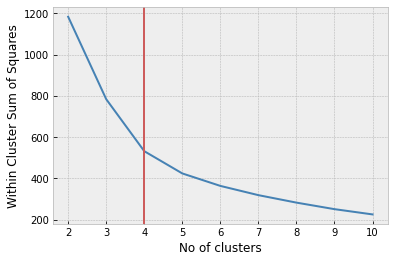

In [9]:
# WCSS Graph
plt.plot(range(2,11), wcss, color="steelblue")
#plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.axvline(4, color="indianred") # vertical
#plt.savefig(path_fig+"\Elbowmethod.png")
plt.show()

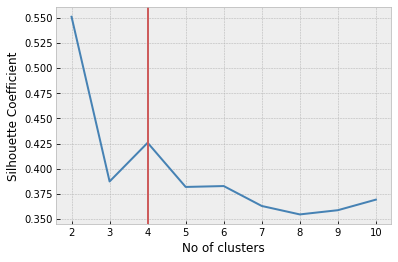

In [10]:
# SC Graph
plt.plot(range(2,11), sil, color="steelblue")
#plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Coefficient')
plt.axvline(4, color="indianred") # vertical
#plt.savefig(path_fig+"\Elbowmethod.png")
plt.show()

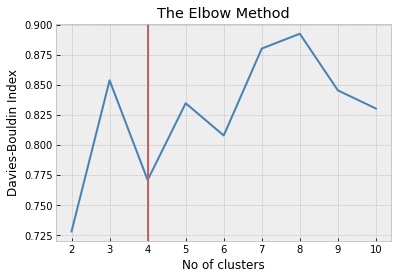

In [11]:
# DB Graph
plt.plot(range(2,11), db, color="steelblue")
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.axvline(4, color="indianred") # vertical
#plt.savefig(path_fig+"\Elbowmethod.png")
plt.show()

# Cluster visualization

In [12]:
# Cluster label estimation
kmeans4 = KMeans(n_clusters= 4, init='k-means++', random_state=0)
kmeans4.fit(components)

# Cluster label estimation
kmeans2 = KMeans(n_clusters= 2, init='k-means++', random_state=0)
kmeans2.fit(components)

#data_insurance = pd.concat([data_insurance, components, pd.Series(kmeans.labels_, name="Cluster")], axis=1)


data_final = pd.concat([data_insurance, components
                        , pd.Series(kmeans4.labels_, name="Cluster4")
                        , pd.Series(kmeans2.labels_, name="Cluster2")], axis=1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

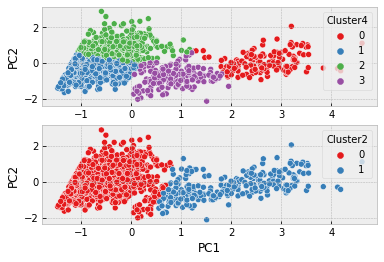

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1)

#fig.figure(figsize=(15,7))
sns.scatterplot(ax=ax1, data=data_final, x="PC1", y="PC2", hue="Cluster4", palette="Set1")
sns.scatterplot(ax=ax2, data=data_final, x="PC1", y="PC2", hue="Cluster2", palette="Set1")

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

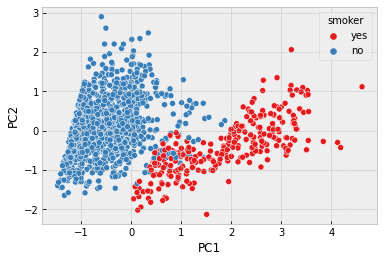

In [14]:
sns.scatterplot(data=data_final, x="PC1", y="PC2", hue="smoker", palette="Set1")

In [15]:
data_final

,age,sex,bmi,children,smoker,region,charges,PC1,PC2,Cluster4,Cluster2
0,19,female,27.900,0,yes,southwest,16884.92400,0.433873,-0.795609,3,0
1,18,male,33.770,1,no,southeast,1725.55230,-0.954699,0.830029,2,0
2,28,male,33.000,3,no,southeast,4449.46200,-0.659474,0.752313,2,0
3,33,male,22.705,0,no,northwest,21984.47061,0.303372,-0.884206,3,0
4,32,male,28.880,0,no,northwest,3866.85520,-0.902544,-0.028973,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,-0.174091,0.179844,2,0
1334,18,female,31.920,0,no,northeast,2205.98080,-1.125333,-0.036601,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,-1.006592,0.871748,2,0
1336,21,female,25.800,0,no,southwest,2007.94500,-1.265407,-0.539297,1,0


In [16]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
# Defining the Hopkins test function    
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

In [17]:
Cluster4 = data_final["Cluster4"]
Cluster2 = data_final["Cluster2"]
hopkins(components)

0.910387117183963

In [18]:
# K-Means K=4

charges_k4c0 = data_insurance.charges.values[Cluster4==0]
charges_k4c1 = data_insurance.charges.values[Cluster4==1]
charges_k4c2 = data_insurance.charges.values[Cluster4==2]
charges_k4c3 = data_insurance.charges.values[Cluster4==3]

# K-Means K=2

charges_k2c0 = data_insurance.charges.values[Cluster2==0]
charges_k2c1 = data_insurance.charges.values[Cluster2==1]


In [19]:
smoker = data_insurance["smoker"]
age = data_insurance["age"]
sex = data_insurance["sex"]
bmi = data_insurance["bmi"]
children = data_insurance["children"]
region = data_insurance["region"]

#variable smoker
charges_sy = data_insurance.charges.values[smoker=="yes"]
charges_sn = data_insurance.charges.values[smoker=="no"]

#other variables
charges_age1 = data_insurance.charges.values[age>=60]
charges_age2 = data_insurance.charges.values[age<60]

charges_sexm = data_insurance.charges.values[sex=="male"]
charges_sexf = data_insurance.charges.values[sex=="female"]

charges_bmi1 = data_insurance.charges.values[bmi >= 30] #obesity
charges_bmi2 = data_insurance.charges.values[bmi < 30]

charges_children1 = data_insurance.charges.values[children < 1] #No children
charges_children2 = data_insurance.charges.values[children >= 1] #One children or more

charges_rse = data_insurance.charges.values[region == "southeast"]
charges_rsw = data_insurance.charges.values[region == "southwest"]
charges_rne = data_insurance.charges.values[region == "northwest"]
charges_rnw = data_insurance.charges.values[region == "northeast"]

In [20]:
from scipy import stats

#t-test unequal variance between two arrays
def ttest_different_means(a,b):
    res = stats.ttest_ind(a, b, equal_var=False)
    if res[1]<0.05:
        passed="Yes"
    else:
        passed="No"
    return [res[0],passed]

In [21]:
ttest_different_means(charges_sy, charges_sn)
ttest_different_means(charges_age1, charges_age2)
ttest_different_means(charges_sexm, charges_sexf)
ttest_different_means(charges_bmi1, charges_bmi1)
ttest_different_means(charges_children1, charges_children2)

#Regions
ttest_different_means(charges_rse,charges_rsw)
ttest_different_means(charges_rse,charges_rne)
ttest_different_means(charges_rse,charges_rnw)

ttest_different_means(charges_rsw,charges_rne)
ttest_different_means(charges_rsw,charges_rnw)

ttest_different_means(charges_rne,charges_rnw)

[-1.1281393729675913, 'No']

In [22]:
stats.ttest_ind(charges_age1, charges_age2, equal_var=False)

Ttest_indResult(statistic=7.166267578131565, pvalue=4.828887787043713e-11)

In [23]:
arr = {"Statistic": [], "Passed 95%": []}
j = 0
for i in ["Statistic", "Passed 95%"]:
    arr[i].append(ttest_different_means(charges_sy, charges_sn)[j])
    arr[i].append(ttest_different_means(charges_age1, charges_age2)[j])
    arr[i].append(ttest_different_means(charges_sexm, charges_sexf)[j])
    arr[i].append(ttest_different_means(charges_bmi1, charges_bmi2)[j])
    arr[i].append(ttest_different_means(charges_children1, charges_children2)[j])
    
    arr[i].append(ttest_different_means(charges_rse,charges_rsw)[j])
    arr[i].append(ttest_different_means(charges_rse,charges_rne)[j])
    arr[i].append(ttest_different_means(charges_rse,charges_rnw)[j])

    arr[i].append(ttest_different_means(charges_rsw,charges_rne)[j])
    arr[i].append(ttest_different_means(charges_rsw,charges_rnw)[j])
    
    arr[i].append(ttest_different_means(charges_rne,charges_rnw)[j])
    # Cluster K=2
    arr[i].append(ttest_different_means(charges_k2c1,charges_k2c0)[j])
    
    # Cluster K=4
    arr[i].append(ttest_different_means(charges_k4c0,charges_k4c1)[j])
    arr[i].append(ttest_different_means(charges_k4c0,charges_k4c2)[j])
    arr[i].append(ttest_different_means(charges_k4c0,charges_k4c3)[j])
    
    arr[i].append(ttest_different_means(charges_k4c1,charges_k4c2)[j])
    arr[i].append(ttest_different_means(charges_k4c1,charges_k4c3)[j])
    
    arr[i].append(ttest_different_means(charges_k4c2,charges_k4c3)[j])
    
    j = 1

In [24]:
index= ["Smoker vs Non-smoker", "Old(60+) vs Adults (60-)", "Males vs Females", "Obesity vs Rest",
        "Without vs With Children", "Southeast vs Southweast", "Southeast vs Northeast", "Southeast vs Northweast",
        "Southweast vs Northeast", "Southweast vs Northweast", "Northeast vs Northweast", "Cluster(K=2) 1 vs Cluster(K=2) 0", 
        "Cluster(K=4) 0 vs Cluster(K=4) 1", "Cluster(K=4) 0 vs Cluster(K=4) 2", "Cluster(K=4) 0 vs Cluster(K=4) 3",
        "Cluster(K=4) 1 vs Cluster(K=4) 2", "Cluster(K=4) 1 vs Cluster(K=4) 3",
        "Cluster(K=4) 2 vs Cluster(K=4) 3",]

pd.DataFrame(arr, index=index).to_excel(r"Results\Mean t-tests.xlsx")


In [44]:
from sklearn.metrics.cluster import adjusted_rand_score

ARS = adjusted_rand_score(data_final["smoker"], data_final["Cluster2"])

print("Adjusted Rand-Score", f"{ARS:.2%}")


Adjusted Rand-Score 77.80%


In [43]:
from sklearn.metrics import jaccard_score

JS = jaccard_score(pd.get_dummies(data_final["smoker"], drop_first=True), data_final["Cluster2"])

print("Adjusted Rand-Score", f"{JS:.2%}")

Adjusted Rand-Score 77.81%
